In [1]:

#exemple inspire de http://scikit-learn.org/stable/_downloads/plot_isotonic_regression.py

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## PARTIE 1 : Utilisation de scikit-learn pour la regression lineaire


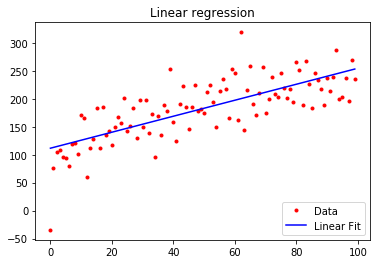

In [2]:
#generation de donnees test
n = 100
x = np.arange(n)
y = np.random.randn(n)*30 + 50. * np.log(1 + np.arange(n))

# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat
fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


#### QUESTION 1.1 : 
Bien comprendre le fonctionnement de lr, en particulier lr.fit et lr.predict

#### Réponses :
*lr est un objet qui permet d'effectuer la regression lineaire*

*lr.fit permet d'apprendre les parametres du modele a partir de donnees d'apprentissage*

*lr.predict permet de predire un 'y' partir d'un 'x' test*


#### QUESTION 1.2 :
On s'interesse a x=105. En supposant que le model lineaire soit toujours valide pour ce x, quelles valeur corresondante de y vous semble la plus vraisemblable ? 

#### Réponse :

In [3]:
lr.predict([[105]])

array([261.80000303])

la valeur est 264.80754151

On remarque que les valeurs donnees pour la prediction doivent etre dans un vecteur colonne, ici une matrice 1x1



## PARTIE 2 : impact et detection d'outliers



b_0=10.614767578423201 et b_1=4.428987468311912


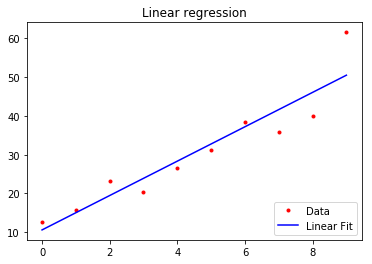

In [4]:


#generation de donnees test
n = 10
x = np.arange(n)
y = 10. + 4.*x + np.random.randn(n)*3. 
y[9]=y[9]+20

# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()




#### QUESTION 2.1 : 

La ligne 'y[9]=y[9]+20' genere artificiellement une donnee aberrante.

Tester l'impact de la donnee aberrante en estimant b_0, b_1 et s^2 sur 5 jeux de donnees qui la contiennent cette donnee et 5 autres qui ne la contiennent pas (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $sigma=3$ dans les données simulees.


In [10]:
#sans donnee aberrante
print('Les valeurs recherchees sont 10 et 4. Le bruit réel est 3.\n')
for i in range(5):
  n = 10
  x = np.arange(n)
  y = 10. + 4.*x + np.random.randn(n)*3. 
  lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'
  print('b_0='+str(lr.intercept_)+' b_1='+str(lr.coef_[0]))
  s=np.std(y-lr.predict(x[:, np.newaxis]))
  print('Bruit estime='+str(s)+'\n')



Les valeurs recherchees sont 10 et 4. Le bruit réel est 3.

b_0=10.976385066545213 b_1=3.804857109554501
Bruit estime=2.235692477744437

b_0=8.030575998067906 b_1=4.404213106211886
Bruit estime=1.9186754965837038

b_0=10.12862739545843 b_1=3.7786107025502997
Bruit estime=2.785356906814625

b_0=8.503785595160092 b_1=4.067006589783584
Bruit estime=3.3495908128566305

b_0=11.224214512202593 b_1=3.657276860541601
Bruit estime=3.3877824333155004



In [11]:
#avec donnee aberrante
print('Les valeurs recherchees sont 10 et 4. Le bruit réel est 3.\n')
for i in range(5):
  n = 10
  x = np.arange(n)
  y = 10. + 4.*x + np.random.randn(n)*3. 
  y[9]=y[9]+20
  lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'
  print('b_0='+str(lr.intercept_)+' b_1='+str(lr.coef_[0]))
  s=np.std(y-lr.predict(x[:, np.newaxis]))
  print('Bruit estime='+str(s)+'\n')



Les valeurs recherchees sont 10 et 4. Le bruit réel est 3.

b_0=7.271858911825596 b_1=5.4726818144126055
Bruit estime=5.346698983074109

b_0=5.021787033917342 b_1=5.285014733227297
Bruit estime=6.220796831708812

b_0=6.245763311082154 b_1=4.973447609664911
Bruit estime=6.003948727924154

b_0=6.573872442358372 b_1=5.093683232782923
Bruit estime=5.332235518298807

b_0=7.985232668459023 b_1=5.041023236734122
Bruit estime=5.085300250680033



Estimations correctes sans donnee aberrante mais biaisees avec la donnee aberrante.

On peut mesurer le biais en comparant la moyenne des parametres estimes aux vrais valeures des parametres sur un grand nombre de repetitions


#### QUESTION 2.2 : 
##### 2.2.a : 
Pour chaque variable i, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les j, ou  \hat{y_{(i)j}} est l'estimation de y_j a partir d'un modele  lineaire appris sans l'observation i.
##### 2.2.b : 
En quoi le profil des e_{(i)j} est different pour i=9 que pour les autre i
##### 2.2.c : 
Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un element 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


In [14]:
#-> regeneration de donnees biaisees 
n = 10
x = np.arange(n)
y = 10. + 4.*x + np.random.randn(n)*3. 
y[9]=y[9]+20



##### Réponse 2.2.a

In [15]:
for i in range(n):
  x_del_i=np.delete(x,i)
  y_del_i=np.delete(y,i) 
  
  lr.fit(x_del_i[:, np.newaxis], y_del_i)
  
  print('variable supprimee='+str(i))
  print('residus ='+str(y-lr.predict(x[:, np.newaxis])))


variable supprimee=0
residus =[ 4.43715534  6.16807499  0.53296861  2.30384262 -1.58296907 -9.41566144
  1.31935752 -8.68327842 -7.91246052 17.2701257 ]
variable supprimee=1
residus =[ 4.79229386  6.48991062  0.82150136  2.55907247 -1.3610421  -9.22703736
  1.47467872 -8.56126011 -7.82374509 17.32553824]
variable supprimee=2
residus =[ 2.75640274  4.74831277 -0.62580321  1.40606118 -2.21976012 -9.79146211
  1.20454725 -8.5370983  -7.50529001 17.9382866 ]
variable supprimee=3
residus =[ 3.21621301  5.15796999 -0.26629904  1.7154123  -1.96056204 -9.58241708
  1.36343923 -8.42835937 -7.44670413 17.94671943]
variable supprimee=4
residus =[ 2.59957894  4.58703671 -0.79153154  1.2358806  -2.39439296 -9.97054721
  1.02100989 -8.72508793 -7.6977319  17.74139245]
variable supprimee=5
residus =[  2.11472281   4.02186935  -1.43701012   0.51009079  -3.200494
 -10.85695948   0.05428639  -9.77212265  -8.82507785  16.53373528]
variable supprimee=6
residus =[ 2.93012574  4.92887791 -0.43839594  1.6003

##### Réponse 2.2.b
L'estimation de j=9 est toujours la plus mauvaise. Elle est plus mauvaise quand i=9 enleve de l'apprentissage que pour tous les autres i est, alors que toutes les  autres predictions sont meilleures.

... on peut clairement se douter que cette observation est un outlier (donnee aberrante). 


##### Réponse 2.2.c

In [16]:
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'
y_pred=lr.predict(x[:, np.newaxis])

s2=np.sum((y-y_pred)*(y-y_pred))/(n-2)




for i in range(n):
  x_del_i=np.delete(x,i)
  y_del_i=np.delete(y,i) 
  
  lr.fit(x_del_i[:, np.newaxis], y_del_i)
  sum_squared_error=np.sum((y_pred-lr.predict(x[:, np.newaxis]))*(y_pred-lr.predict(x[:, np.newaxis])))
  
  print('D('+str(i)+')='+str(sum_squared_error/(2.*s2)))


D(0)=0.046450822500104405
D(1)=0.07147770067834831
D(2)=0.0004700920027703967
D(3)=0.0025577943395561544
D(4)=0.004034122315141881
D(5)=0.08294202625415215
D(6)=0.0017510200497534315
D(7)=0.12831369372794757
D(8)=0.16943044133757362
D(9)=1.7675180024662605


La distance est clairement plus grande pour la valeur 9 que toutes les autres, qui sont stable. La donnee aberrante est encore retrouvee.


## PARTIE 3 : Vers la regression lineaire multiple et optimisation

On considere que l'on connait les notes moyennes sur l'annee de n eleves dans p matieres, ainsi que leur note a un concours en fin d'annee. On  se demande si on ne pourrait pas predire la note des etudiants au concours en fonction de leur moyenne annuelle afin d'estimer leurs chances au concours.


On va resoudre le probleme a l'aide de la regression lineaire en dimension p>1 sans utiliser scikit-learn. 



##### Question 1 :
A l'aide de la fonction 'SimulateObservations', simulez un jeu de donnees d'apprentissage [X_l,y_l] avec 30 observations et un jeu de test [X_t,y_t] avec 10 observations. Les observations seront en dimension p=10

##### Réponse :

In [17]:


def SimulateObservations(n_train,n_test,p):
  """
  n_train: number of training obserations to simulate
  n_test: number of test obserations to simulate
  p: dimension of the observations to simulate
  """
  
  ObsX_train=20.*np.random.rand(n_train,p)
  ObsX_tst=20.*np.random.rand(n_test,p)
  
  RefTheta=np.random.rand(p)**3
  RefTheta=RefTheta/RefTheta.sum()
  print("The thetas with which the values were simulated is: "+str(RefTheta))
  
  ObsY_train=np.dot(ObsX_train,RefTheta.reshape(p,1))+1.5*np.random.randn(n_train,1)
  ObsY_tst=np.dot(ObsX_tst,RefTheta.reshape(p,1))+1.5*np.random.randn(n_test,1)
  
  return [ObsX_train,ObsY_train,ObsX_tst,ObsY_tst,RefTheta]

p=10

[ObsX_train,ObsY_train,ObsX_tst,ObsY_tst,RefTheta]=SimulateObservations(30,10,p)


The thetas with which the values were simulated is: [2.86114352e-01 1.56173766e-05 1.25258438e-01 1.12742561e-04
 2.18916917e-02 2.45312639e-01 6.80206482e-02 1.15628753e-01
 2.07533636e-03 1.35569781e-01]


##### Question 2 :
On considere un modele lineaire en dimension p>1 mettre en lien les x[i,:] et les y[i], c'est a dire que np.dot(x[i,:],theta_optimal) doit etre le plus proche possible de y[i] sur l'ensemble des observations i. Dans le modele lineaire multiple, theta_optimal est un vecteur de taille [p,1] qui pondere les differentes variables observees (ici les moyennes dans une matiere). Coder alors une fonction qui calcule la moyenne des differences au carre entre ces valeurs en fonction de theta.

##### Réponse :

In [20]:

def CptMSE(X,y_true,theta_test):
  y_pred=np.dot(X,theta_test)[:, np.newaxis]
  #print(y_pred.shape)
  #print(y_true.shape)
  MSE=np.mean(np.power(y_pred-y_true,2.))
  
  return MSE


theta_test=np.abs(np.random.randn(p))

MSE_test=CptMSE(ObsX_train,ObsY_train,theta_test)


##### Question 3 -- option 1 :
On va maintenant chercher le theta_test qui minimise cette fonction (il correspondra a theta_optimal), et ainsi résoudre le probleme d'apprentissage de regression lineaire multiple. Utiliser pour cela la fonction minimize de scipy.optimize

##### Réponse :


In [23]:

global X
global y_true

def CptMyPbSpecificMSE(theta_test):
  """
  fonction optimisee par minimize
  """
  global X
  global y_true
  
  MSE_test=CptMSE(ObsX_train,ObsY_train,theta_test)
  
  return MSE_test


from scipy.optimize import minimize

theta_init=np.abs(np.random.randn(p))/10.


res = minimize(CptMyPbSpecificMSE, theta_init, method='Powell',options={'xtol': 10, 'disp': True})

print("Optimal theta found="+str(res.x))


#) ... validate the results

print('\nResults assessment on the training set:')

MSE_init=CptMSE(ObsX_train,ObsY_train,theta_test)
print("MSE="+str(MSE_init)+" with theta init")


MSE_final=CptMSE(ObsX_train,ObsY_train,res.x)
print("MSE="+str(MSE_final)+" with the final theta")


MSE_ref=CptMSE(ObsX_train,ObsY_train,RefTheta)
print("MSE="+str(MSE_ref)+" with the reference theta")




print('\nResults assessment on the test set:')

MSE_init=CptMSE(ObsX_tst,ObsY_tst,theta_test)
print("MSE="+str(MSE_init)+" with theta init")


MSE_final=CptMSE(ObsX_tst,ObsY_tst,res.x)
print("MSE="+str(MSE_final)+" with the final theta")


MSE_ref=CptMSE(ObsX_tst,ObsY_tst,RefTheta)
print("MSE="+str(MSE_ref)+" with the reference theta")




Optimization terminated successfully.
         Current function value: 1.231751
         Iterations: 18
         Function evaluations: 1346
Optimal theta found=[ 0.27615826  0.02617968 -0.0041731   0.03132831  0.0234688   0.24372727
  0.15684624  0.06361828 -0.02023879  0.18222637]

Results assessment on the training set:
MSE=4501.41974118281 with theta init
MSE=1.2317511617778965 with the final theta
MSE=1.830616818912318 with the reference theta

Results assessment on the test set:
MSE=5216.484615522512 with theta init
MSE=2.677612614800815 with the final theta
MSE=2.3275309862981333 with the reference theta


Il est interessant de remarquer qu'on a sur-appris : meilleur resultat avec 'MSE_final' que 'MSE_ref' sur 'training set'    /    meilleur resultat avec 'MSE_ref' que 'MSE_final' sur 'test set'


##### Question 3 -- option 2 :

De maniere alternative, le probleme peut etre resolu a l'aide d'une methode de descente de gradient codee a la main, dans laquelle les gradients seront calcules par differences finies.

##### Réponse :

3.1957086934481795
3.066360628371413
2.9515695664170893
2.84692327907218
2.7506222472154525
2.661644640915621
2.579213912365548
2.502689715193108
2.431515116697568
2.365203858093742
2.303326452119886
2.245503114700385
2.191396225599236
2.1407049004033003
2.093159949584004
2.0485198166748506
2.0065670072276522
1.9671050947050326
1.9299561313363789
1.894958441469891
1.8619647182578294
1.8308403872245573
1.8014621912145143
1.7737169658535161
1.7475005758771225
1.7227169891827403
1.699277468172816
1.677099861595876
1.656107982467722
1.636231059974473
1.6174032550640034
1.5995632310051775
1.5826537714939273
1.5666214400029799
1.551416274989918
1.5369915163684051
1.5233033593137708
1.5103107320309868
1.4979750945927357
1.4862602563561595
1.475132209809226
1.4645589789910092
1.454510480874641
1.444958398318371
1.4358760633656897
1.427238349832166
1.4190215742504904
1.41120340435687
1.4037627744010774
1.3966798066459336
1.389935738497596
1.3835128547661883
1.3773944246160492
1.3715646428110053

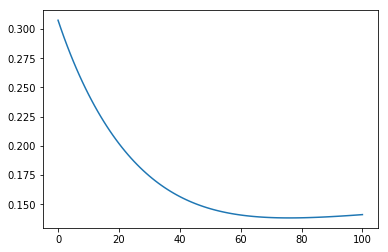

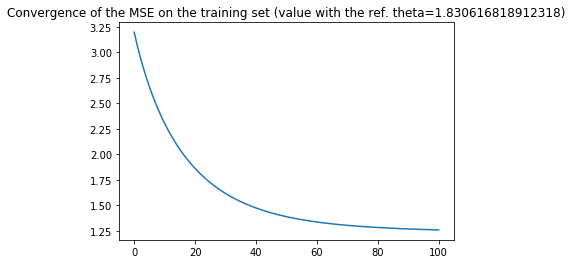

In [24]:


def gradientApprox(fct_to_minimize,theta_loc,X_loc,Y_loc,epsilon=1e-5):
  
  fx=fct_to_minimize(X_loc,Y_loc,theta_loc)
  print(fx)
  ApproxGrad=np.zeros(np.size(theta_loc))
  veps=np.zeros(np.size(theta_loc))
  
  for i in range(np.size(theta_loc)):
    veps[:]=0.
    veps[i]+=epsilon
    ApproxGrad[i]=(fct_to_minimize(X_loc,Y_loc,theta_loc+veps)-fx)/epsilon
  return ApproxGrad


def GradientDescent(fct_to_minimize,theta_init,X_loc,Y_loc,alpha=0.01,N=100):
  """
  Remark: the multiplicatory coefficient of the gradients will be "alpha" divided by the norm of the first gradient 
  """
  
  #init
  l_thetas=[theta_init]
  theta_curr=theta_init.copy()

  #run the gradient descent
  n=0
  while n<N:
    #approximate the gradient of fct_to_minimize w.r.t. theta_curr
    g=gradientApprox(fct_to_minimize,theta_curr,X_loc,Y_loc)
    
    #set the multiplicatory coefficient of the gradients
    if n==0:
      NormFirstGrads=np.linalg.norm(g)
      coefMult=alpha/NormFirstGrads
      
    #update theta
    theta_curr=theta_curr-coefMult*g
    
    #save the current state and increment n
    l_thetas.append(theta_curr)
    n+=1

  return l_thetas


theta_init=np.ones(p)/p


l_thetas=GradientDescent(CptMSE,theta_init,ObsX_train,ObsY_train)


convergence_curve=[]
for i in range(len(l_thetas)):
  convergence_curve.append(np.linalg.norm(l_thetas[i]-RefTheta))


plt.plot(np.array(convergence_curve))
plt.show()

convergence_MSE_train=[]
for i in range(len(l_thetas)):
  convergence_MSE_train.append(CptMSE(ObsX_train,ObsY_train,l_thetas[i]))

plt.plot(np.array(convergence_MSE_train))
plt.title('Convergence of the MSE on the training set (value with the ref. theta='+str(CptMSE(ObsX_train,ObsY_train,RefTheta))+')')
plt.show()



In [25]:
#) ... validate the results


print('\nResults assessment on the training set:')

MSE_init=CptMSE(ObsX_train,ObsY_train,theta_test)
print("MSE="+str(MSE_init)+" with theta init")


MSE_final=CptMSE(ObsX_train,ObsY_train,l_thetas[-1])
print("MSE="+str(MSE_final)+" with the final theta")


MSE_ref=CptMSE(ObsX_train,ObsY_train,RefTheta)
print("MSE="+str(MSE_ref)+" with the reference theta")




print('\nResults assessment on the test set:')

MSE_init=CptMSE(ObsX_tst,ObsY_tst,theta_test)
print("MSE="+str(MSE_init)+" with theta init")


MSE_final=CptMSE(ObsX_tst,ObsY_tst,l_thetas[-1])
print("MSE="+str(MSE_final)+" with the final theta")


MSE_ref=CptMSE(ObsX_tst,ObsY_tst,RefTheta)
print("MSE="+str(MSE_ref)+" with the reference theta")





Results assessment on the training set:
MSE=4501.41974118281 with theta init
MSE=1.2599692950621775 with the final theta
MSE=1.830616818912318 with the reference theta

Results assessment on the test set:
MSE=5216.484615522512 with theta init
MSE=2.640473855948861 with the final theta
MSE=2.3275309862981333 with the reference theta


Il est interessant de remarquer qu'on a sur-appris : meilleur resultat avec 'MSE_final' que 'MSE_ref' sur 'training set'    /    meilleur resultat avec 'MSE_ref' que 'MSE_final' sur 'test set'



## PARTIE 4 : maximum de vraisemblance

- Tirer 10 fois une piece a pile ou face et modeliser les resultats obtenus comme ceux d'une variable aleatoire X qui vaut X_i=0 si on a pile et X_i=1 si on a face.
- Calculer le maximum de vraisemblance du parametre p d'un loi de Bernoulli qui modeliserait le probleme.
- Vérifier empiriquement comment évolue ce maximum de vraisemblance si l'on effectue de plus en plus de tirages
- Que se passe-t-il quand il y a trop de tirages ? Représenter la log-vraisemblance plutot que la vraisemblance dans ce cas.



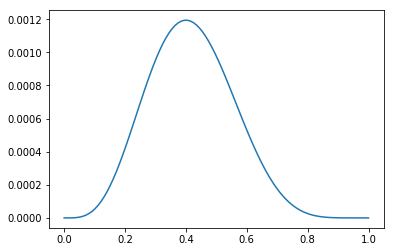

In [26]:


NbPile=4.
NbFace=6.


PossibleValuesForP=np.linspace(0,1,100)

CorrespondingLikelihood=((PossibleValuesForP)**NbPile)*((1-PossibleValuesForP)**NbFace)

plt.plot(PossibleValuesForP,CorrespondingLikelihood)
plt.show()



On peut prendre le max sur cette grille (methode grid search), ou bien on peut faire une descente de gradient comme dans la partie 3

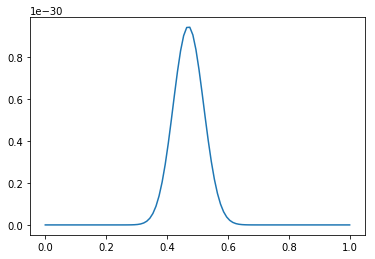

In [27]:
NbPile=47.
NbFace=53.

CorrespondingLikelihood=((PossibleValuesForP)**NbPile)*((1-PossibleValuesForP)**NbFace)

plt.plot(PossibleValuesForP,CorrespondingLikelihood)
plt.show()



On se rapproche peu a peu de p=0.5. Attention aux erreurs numériques quand le nombre de tirages devient trop grand. On utilisera plutot la log-vraisemblance dans ce cas.


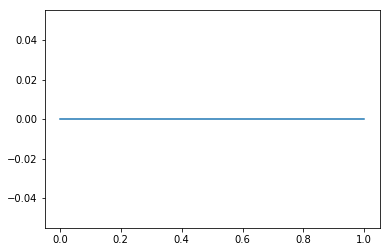

In [29]:
NbPile=1005.
NbFace=995.

PossibleValuesForP=np.linspace(0,1,100)

CorrespondingLikelihood=((PossibleValuesForP)**NbPile)*((1-PossibleValuesForP)**NbFace)

plt.plot(PossibleValuesForP,CorrespondingLikelihood)  
plt.show()


On ne voit rien -> problemes numériques

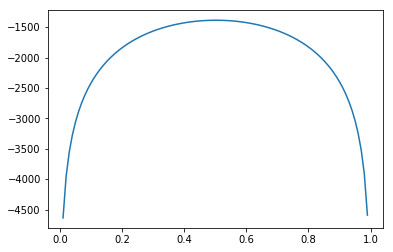

In [30]:



PossibleValuesForP=np.linspace(0.01,0.99,100)

CorrespondingLogLikelihood=NbPile*np.log(PossibleValuesForP)  +     NbFace*np.log(1-PossibleValuesForP)

plt.plot(PossibleValuesForP,CorrespondingLogLikelihood)  
plt.show()


Ca marche maintenant !
